In [1]:
"""Use GMRES and augmented least squares to find optimal Tikhonov regularisation"""

'Use GMRES and augmented least squares to find optimal Tikhonov regularisation'

In [2]:
from functools import partial

import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter

from deblurring.blurring import blur_and_noise
from solvers.least_square import GMRESSolver, LSQRSolver
from common.operators import derivative_operator, identity_operator
from evaluation.tuning import StandardTuner

Estimated noise variance 0.00039759102566335315 vs. actual 0.0004


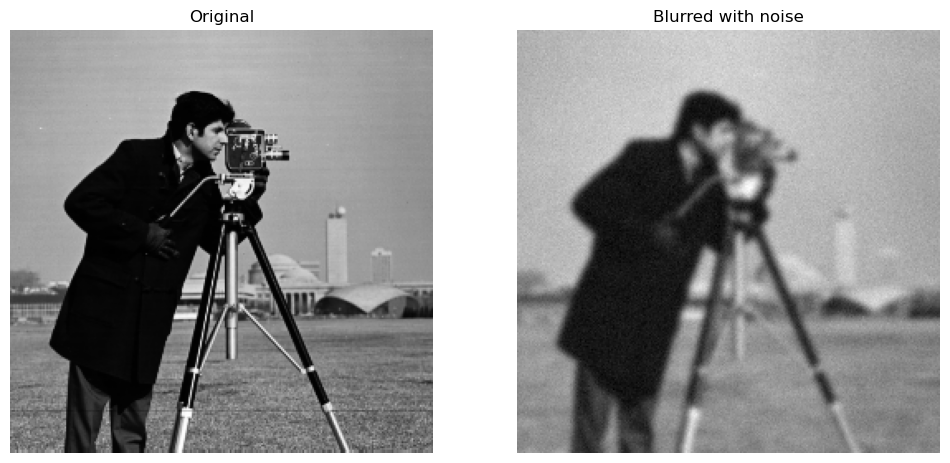

In [3]:
"""Read image and blur with added noise"""

f = plt.imread("../../data/Cameraman256.png")
f = (f - f.min()) / (f.max() - f.min())

theta = 0.02
sigma = 2.0
kernel = partial(gaussian_filter, sigma=sigma)
g = blur_and_noise(f, kernel, theta)
noise_variance = np.var(blur_and_noise(np.zeros_like(g), kernel, theta))
print(f"Estimated noise variance {noise_variance} vs. actual {np.square(theta)}")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(f, cmap="gray")
plt.axis("off")
plt.title("Original")
plt.subplot(1, 2, 2)
plt.imshow(g, cmap="gray")
plt.axis("off")
plt.title("Blurred with noise")
plt.show()

In [4]:
"""Set up parameters, regularisation operators and tuners"""

alphas = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1]

gmres_tuner = StandardTuner(
    solver=GMRESSolver,
    g=g,
    A=kernel,
    noise_variance=noise_variance,
    f=f,
)

lsqr_tuner = StandardTuner(
    solver=LSQRSolver,
    g=g,
    A=kernel,
    noise_variance=noise_variance,
    f=f,
)

[WARNING] 2025-02-25 14:27:09 | No valid reference provided | evaluation.eval_metrics-__init__:60
[WARNING] 2025-02-25 14:27:09 | No valid reference provided | evaluation.eval_metrics-__init__:60


[INFO] 2025-02-25 14:27:51 | Alpha 1e-08: discrepancy -0.00010384965630817365 | evaluation.eval_metrics-log_metrics:208
[INFO] 2025-02-25 14:28:43 | Alpha 1e-07: discrepancy -0.00010358338740915041 | evaluation.eval_metrics-log_metrics:208
[INFO] 2025-02-25 14:29:22 | Alpha 1e-06: discrepancy -0.00010143707001202386 | evaluation.eval_metrics-log_metrics:208
[INFO] 2025-02-25 14:29:35 | Alpha 1e-05: discrepancy -9.305523965763747e-05 | evaluation.eval_metrics-log_metrics:208
[INFO] 2025-02-25 14:29:38 | Alpha 0.0001: discrepancy -7.864122896476767e-05 | evaluation.eval_metrics-log_metrics:208
[INFO] 2025-02-25 14:29:39 | Alpha 0.001: discrepancy -6.122492079247555e-05 | evaluation.eval_metrics-log_metrics:208
[INFO] 2025-02-25 14:29:39 | Alpha 0.01: discrepancy -1.1841291883731009e-05 | evaluation.eval_metrics-log_metrics:208
[INFO] 2025-02-25 14:29:39 | Alpha 0.1: discrepancy 0.002278626383840399 | evaluation.eval_metrics-log_metrics:208
[INFO] 2025-02-25 14:29:39 | Alpha 1.0: discrepa

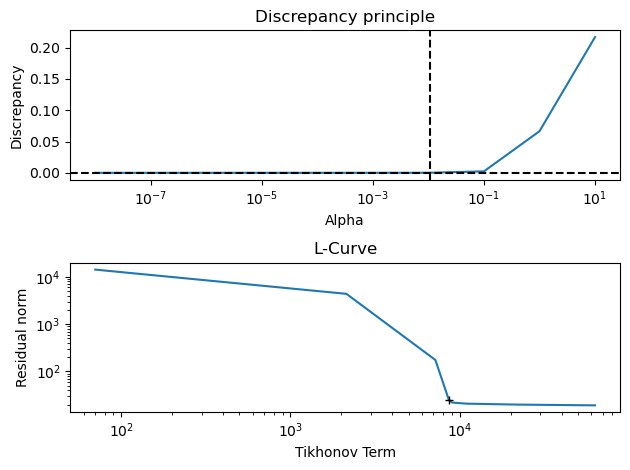

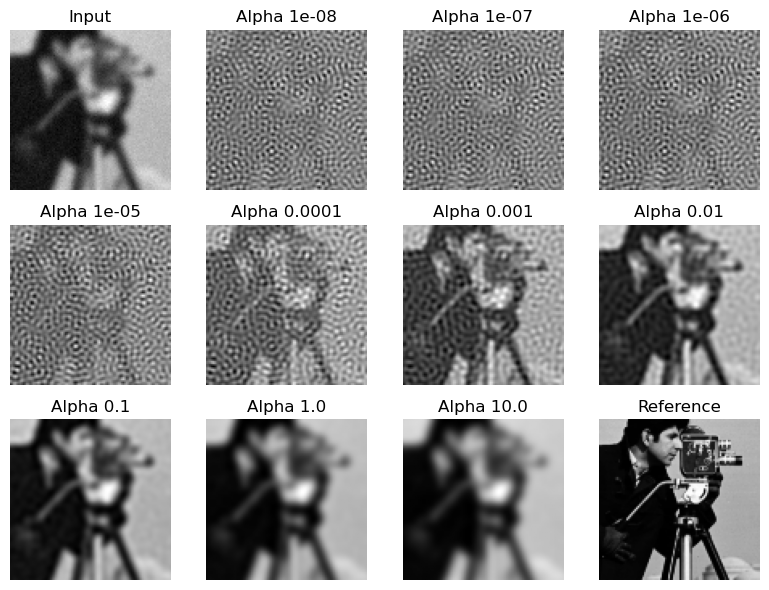

Optimal alpha: 0.010465283261069758
DP: -8.630835252190739e-06, MSE: 0.0044257439559041226


In [5]:
"""Find optimal alpha using GMRES and TK0"""

gmres_tuner.parameter_sweep(
    alphas=alphas,
    L=identity_operator,
    noise_variance=noise_variance,
    save_imgs=True
)
gmres_tuner.display_metrics()
gmres_tuner.display_sample(slice(50, 150), slice(80, 180))
print(f"Optimal alpha: {gmres_tuner.optimal_alpha}")
print(f"DP: {gmres_tuner.optimal_metrics['discrepancy']}, MSE: {gmres_tuner.optimal_metrics['MSE']}")
gmres_tk0_f_hat = gmres_tuner._optimal_f_hat

[INFO] 2025-02-25 14:29:42 | Alpha 1e-08: discrepancy -8.08470413850203e-05 | evaluation.eval_metrics-log_metrics:208
[INFO] 2025-02-25 14:29:43 | Alpha 1e-07: discrepancy -8.084703308290213e-05 | evaluation.eval_metrics-log_metrics:208
[INFO] 2025-02-25 14:29:44 | Alpha 1e-06: discrepancy -8.084621226009912e-05 | evaluation.eval_metrics-log_metrics:208
[INFO] 2025-02-25 14:29:45 | Alpha 1e-05: discrepancy -8.077269979109704e-05 | evaluation.eval_metrics-log_metrics:208
[INFO] 2025-02-25 14:29:45 | Alpha 0.0001: discrepancy -7.764945249089453e-05 | evaluation.eval_metrics-log_metrics:208
[INFO] 2025-02-25 14:29:46 | Alpha 0.001: discrepancy -6.16634895145206e-05 | evaluation.eval_metrics-log_metrics:208
[INFO] 2025-02-25 14:29:47 | Alpha 0.01: discrepancy -1.1918251649363758e-05 | evaluation.eval_metrics-log_metrics:208
[INFO] 2025-02-25 14:29:47 | Alpha 0.1: discrepancy 0.0022786241065961177 | evaluation.eval_metrics-log_metrics:208
[INFO] 2025-02-25 14:29:47 | Alpha 1.0: discrepancy 

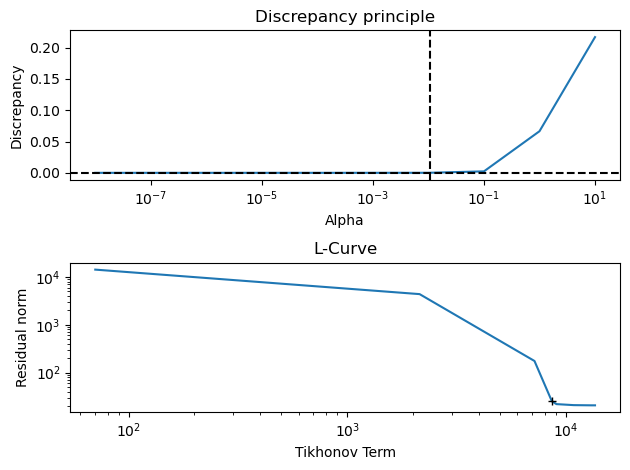

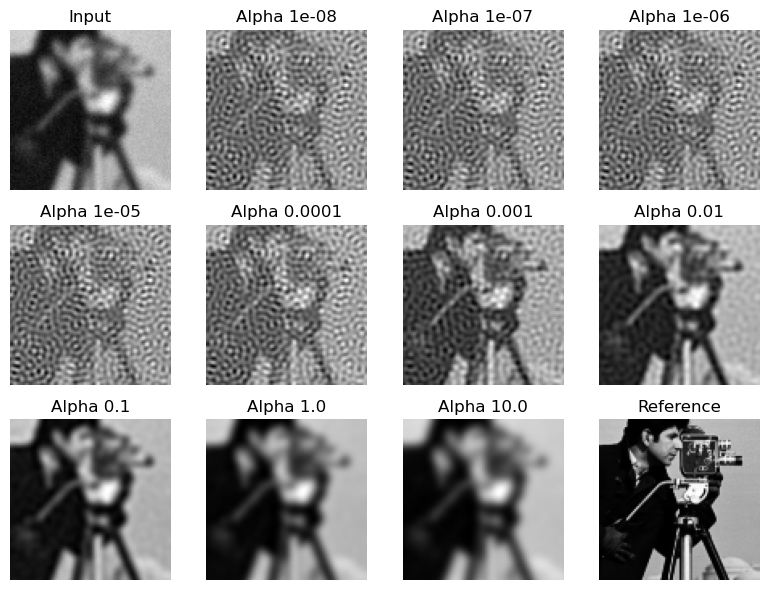

Optimal alpha: 0.010468291994069198
DP: -8.704737739306551e-06, MSE: 0.004428835275873427


In [6]:
"""Find optimal alpha using LSQR and TK0"""

lsqr_tuner.parameter_sweep(
    alphas=alphas,
    L=identity_operator,
    noise_variance=noise_variance,
    save_imgs=True
)
lsqr_tuner.display_metrics()
lsqr_tuner.display_sample(slice(50, 150), slice(80, 180))
print(f"Optimal alpha: {lsqr_tuner.optimal_alpha}")
print(f"DP: {lsqr_tuner.optimal_metrics['discrepancy']}, MSE: {lsqr_tuner.optimal_metrics['MSE']}")
lsqr_tk0_f_hat = lsqr_tuner._optimal_f_hat

[INFO] 2025-02-25 14:30:42 | Alpha 1e-08: discrepancy -0.00010380605335671294 | evaluation.eval_metrics-log_metrics:208
[INFO] 2025-02-25 14:31:32 | Alpha 1e-07: discrepancy -0.00010311591030514412 | evaluation.eval_metrics-log_metrics:208
[INFO] 2025-02-25 14:31:59 | Alpha 1e-06: discrepancy -9.89090103289019e-05 | evaluation.eval_metrics-log_metrics:208
[INFO] 2025-02-25 14:32:07 | Alpha 1e-05: discrepancy -8.816320731173558e-05 | evaluation.eval_metrics-log_metrics:208
[INFO] 2025-02-25 14:32:09 | Alpha 0.0001: discrepancy -7.359812007058452e-05 | evaluation.eval_metrics-log_metrics:208
[INFO] 2025-02-25 14:32:10 | Alpha 0.001: discrepancy -5.772603140385193e-05 | evaluation.eval_metrics-log_metrics:208
[INFO] 2025-02-25 14:32:10 | Alpha 0.01: discrepancy -3.789508673678239e-05 | evaluation.eval_metrics-log_metrics:208
[INFO] 2025-02-25 14:32:10 | Alpha 0.1: discrepancy 1.9092392490825877e-05 | evaluation.eval_metrics-log_metrics:208
[INFO] 2025-02-25 14:32:10 | Alpha 1.0: discrepan

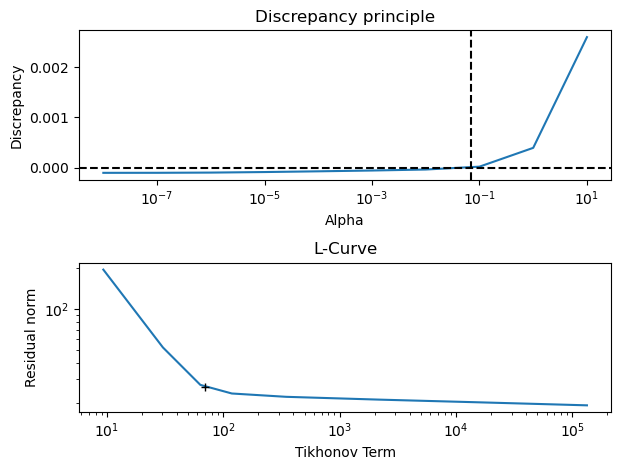

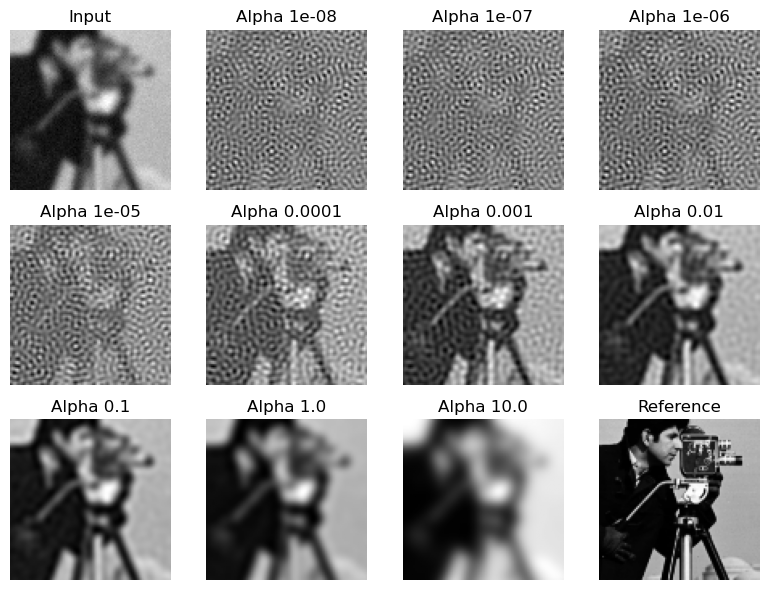

Optimal alpha: 0.06984749373960955
DP: 3.0271936053002588e-06, MSE: 0.004773575014798112


In [7]:
"""Find optimal alpha using GMRES and TK1"""
gmres_tuner.parameter_sweep(
    alphas=alphas,
    L=derivative_operator,
    noise_variance=noise_variance,
    save_imgs=True,
)
gmres_tuner.display_metrics()
gmres_tuner.display_sample(slice(50, 150), slice(80, 180))
print(f"Optimal alpha: {gmres_tuner.optimal_alpha}")
print(f"DP: {gmres_tuner.optimal_metrics['discrepancy']}, MSE: {gmres_tuner.optimal_metrics['MSE']}")
gmres_tk1_f_hat = gmres_tuner._optimal_f_hat

[INFO] 2025-02-25 14:32:14 | Alpha 1e-08: discrepancy -8.08469442961643e-05 | evaluation.eval_metrics-log_metrics:208
[INFO] 2025-02-25 14:32:15 | Alpha 1e-07: discrepancy -8.084603900784744e-05 | evaluation.eval_metrics-log_metrics:208
[INFO] 2025-02-25 14:32:16 | Alpha 1e-06: discrepancy -8.083402904454184e-05 | evaluation.eval_metrics-log_metrics:208
[INFO] 2025-02-25 14:32:17 | Alpha 1e-05: discrepancy -8.048810305819726e-05 | evaluation.eval_metrics-log_metrics:208
[INFO] 2025-02-25 14:32:18 | Alpha 0.0001: discrepancy -7.40224734708743e-05 | evaluation.eval_metrics-log_metrics:208
[INFO] 2025-02-25 14:32:19 | Alpha 0.001: discrepancy -5.803518408633294e-05 | evaluation.eval_metrics-log_metrics:208
[INFO] 2025-02-25 14:32:20 | Alpha 0.01: discrepancy -3.797642442657375e-05 | evaluation.eval_metrics-log_metrics:208
[INFO] 2025-02-25 14:32:20 | Alpha 0.1: discrepancy 1.908733783174125e-05 | evaluation.eval_metrics-log_metrics:208
[INFO] 2025-02-25 14:32:20 | Alpha 1.0: discrepancy 0

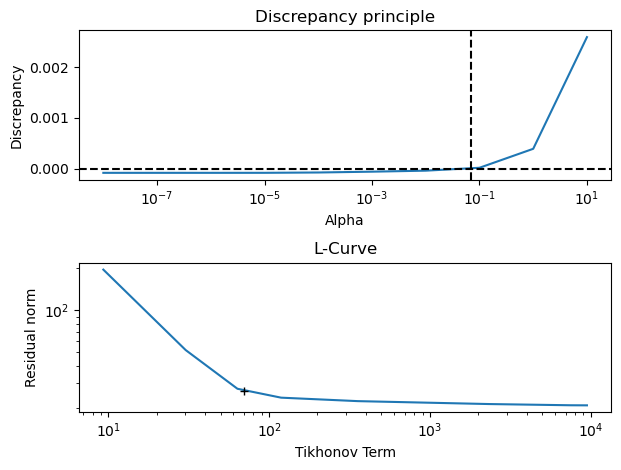

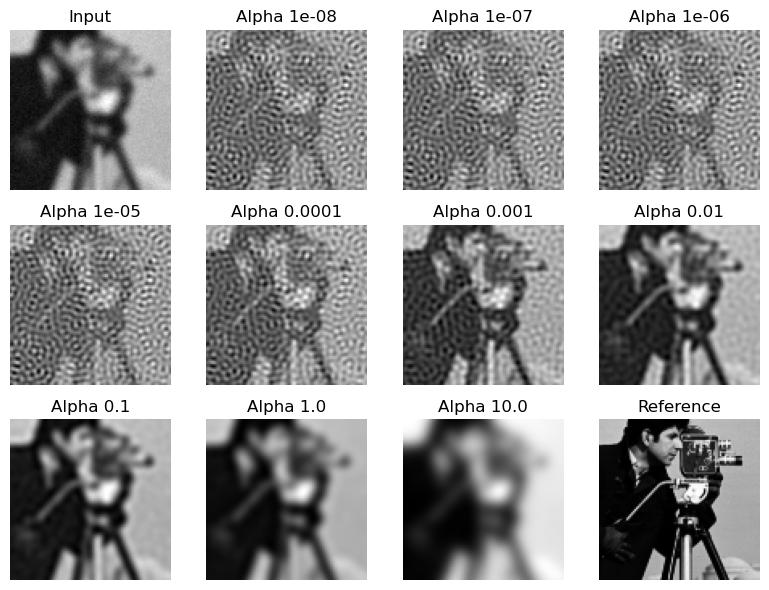

Optimal alpha: 0.06989577383488424
DP: 3.043127657953752e-06, MSE: 0.0047733223210015795


In [8]:
"""Find optimal alpha using LSQR and TK1"""
lsqr_tuner.parameter_sweep(
    alphas=alphas,
    L=derivative_operator,
    noise_variance=noise_variance,
    save_imgs=True,
)
lsqr_tuner.display_metrics()
lsqr_tuner.display_sample(slice(50, 150), slice(80, 180))
print(f"Optimal alpha: {lsqr_tuner.optimal_alpha}")
print(f"DP: {lsqr_tuner.optimal_metrics['discrepancy']}, MSE: {lsqr_tuner.optimal_metrics['MSE']}")
lsqr_tk1_f_hat = lsqr_tuner._optimal_f_hat

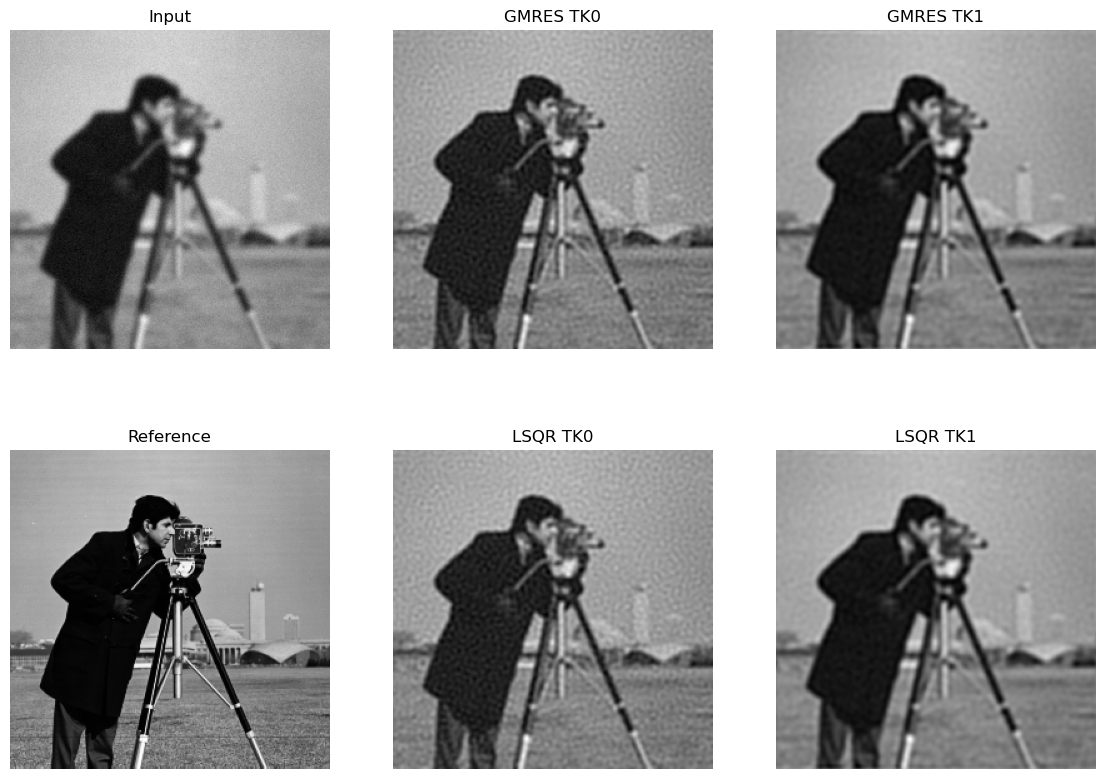

In [9]:
"""Compare different techniques"""

_, axs = plt.subplots(2, 3, figsize=(14, 10))
axs[0, 0].imshow(g, cmap="gray")
axs[0, 0].set_title("Input")
axs[0, 0].axis("off")
axs[0, 1].imshow(gmres_tk0_f_hat, cmap="gray")
axs[0, 1].set_title("GMRES TK0")
axs[0, 1].axis("off")
axs[0, 2].imshow(gmres_tk1_f_hat, cmap="gray")
axs[0, 2].set_title("GMRES TK1")
axs[0, 2].axis("off")
axs[1, 0].imshow(f, cmap="gray")
axs[1, 0].set_title("Reference")
axs[1, 0].axis("off")
axs[1, 1].imshow(lsqr_tk0_f_hat, cmap="gray")
axs[1, 1].set_title("LSQR TK0")
axs[1, 1].axis("off")
axs[1, 2].imshow(lsqr_tk1_f_hat, cmap="gray")
axs[1, 2].set_title("LSQR TK1")
axs[1, 2].axis("off")
plt.show()